<a href="https://colab.research.google.com/github/FunNyLuAz/Modelagem-de-Fenomenos-Fisicos/blob/main/Atividade%20Avaliativa%20Individual%20-%20RA3-A/Atividade%20Avaliativa%20Individual%20-%20RA3-A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Atenção: Regras para a solução da atividade.** 

1. copie este caderno para a sua conta, criando as células de texto e código que forem necessárias após o enunciado de cada questão;

2. não apague os enunciados; 

3. responda as questões na ordem em que elas se apresentam neste caderno;

4. você pode, e deve, consultar todo e qualquer recurso disponível na internet. Mas, não pode consultar nenhum outro ser humano. 

5. poste no AVA (Canvas) o link para a sua resposta. Pode ser um link para a solução no Google Colab, ou um link para o caderno com suas respostas no Github. 

A violação de qualquer uma destas regras provoca a anulação da avaliação. 

Qualquer link que não possa ser executado a partir do link postado irá zerar a avaliação. 

Qualquer link que leve a uma pasta, arquivo comprimido, ou qualquer outro destino que não seja um caderno executável com as suas repostas provocará a anulação da questão. 

**Teste usando outro navegador que não esteja logado nas suas contas**. 

Qualquer link que não possa ser aberto, irá zerar a avaliação. 

Qualquer comunicação com outro ser humano irá zerar a avaliação.  

**A interpretação faz parte da Questão!!!**

In [2]:
import matplotlib.pyplot as pyplot
import numpy as np
import sympy as sp

# Questão 1 (vale até 2 pontos)
Determine a área entre as curvas $$y=xe^{-x^{2}}$$ $$y=x+1$$ $$x=2$$ e o eixo $y$, usando somente matplotlib, numpy, sympy. Trace o gráfico desta área preenchendo a área entre as curvas em uma cor diferente.



Solução: (4.37315206324463)



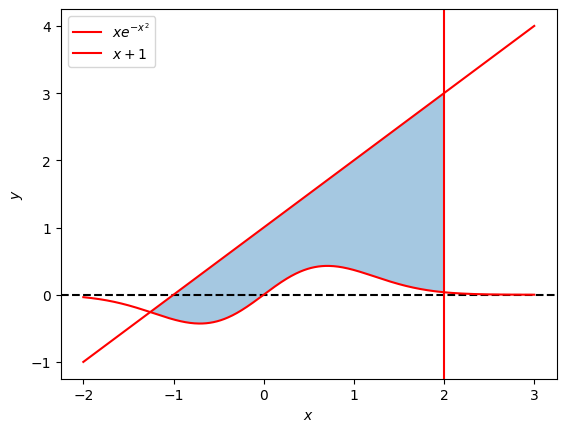

In [39]:
x = sp.Symbol("x")
f1 = x * np.e**(-x**2)
f2 = x + 1

min_x = sp.nsolve(f1 - f2, x, 0) # Equivalente a intersecção entre f1 e f2
max_x = 2  # Equivalente ao gráfico de x = 2
x_lim = 1

# Calcula os valores das funções
vals_x = np.linspace(int(min_x - x_lim), int(max_x + x_lim), 500)
vals_f1 = np.array([f1.subs(x, i) for i in vals_x], dtype=float)
vals_f2 = np.array([f2.subs(x, i) for i in vals_x], dtype=float)
vals_x_i = np.array([i/500 * (max_x - min_x) + min_x for i in range(500)], dtype=float)
vals_f1_i = np.array([f1.subs(x, i) for i in vals_x_i], dtype=float)
vals_f2_i = np.array([f2.subs(x, i) for i in vals_x_i], dtype=float)

# Gráfico
#pyplot.gca().set_aspect('equal', 'datalim')
pyplot.xlabel(r"$x$")
pyplot.ylabel(r"$y$")
pyplot.axhline(y=0, linestyle="--", color="black")

pyplot.plot(vals_x, vals_f1, color="red", label=r"$xe^{-x^2}$")
pyplot.plot(vals_x, vals_f2, color="red", label=r"$x+1$")
pyplot.axvline(x=2, color="red")

pyplot.fill_between(vals_x_i, vals_f1_i, y2=vals_f2_i, step="pre", alpha=0.4)

# Mostra resultados
area1 = sp.integrate(f1, (x, min_x, max_x))
area2 = sp.integrate(f2, (x, min_x, max_x))
print(f"Solução: ({np.abs(area1 - area2)})\n")
pyplot.legend()
pyplot.show()

# Questão 2 (vale até 2 pontos)
Resolva, algebricamente, explicitando em latex todos os passos necessários, as seguintes integrais:

##a) 
$$\int \cos(3t) \sin(8t) dt $$
##b)
$$\int 4x \cos(2-3x) dx$$


a) $$\int \cos(3t) \sin(8t) dt $$
$$\int \frac{1}{2}(\sin(8t-3t)+\sin(8t+3t))$$
$$\int \frac{1}{2}(\sin(5t)+\sin(11t))$$
$$\int \frac{1}{2}\sin(5t)+ \int\frac{1}{2}\sin(11t)$$
$$\frac{1}{2} \int \sin(5t)+ \frac{1}{2}\int\sin(11t)$$
$$\frac{1}{2} (-\frac{1}{5}\cos(5t)+c)+\frac{1}{2}(-\frac{1}{11}\cos(11t)+c)$$
$$-\frac{1}{10}\cos(5t)+ -\frac{1}{22}\cos(11t)+c$$

b)$$\int 4x \cos(2-3x) dx$$
$$4\int x \cos(2-3x) dx$$
$$u = x\text{ e }dv=\cos(2-3x)$$
$$4((x)(-\frac{1}{3}\sin(2-3x)) - \int (-\frac{1}{3}\sin(2-3x))(1) dx)$$
$$4((x)(-\frac{1}{3}\sin(2-3x)) - \int -\frac{1}{3}\sin(2-3x) dx)$$
$$4((x)(-\frac{1}{3}\sin(2-3x)) - (-\frac{1}{3})\int \sin(2-3x) dx)$$
$$4((x)(-\frac{1}{3}\sin(2-3x)) - (-\frac{1}{3})(\frac{1}{3}\cos(2-3x) +c))$$
$$-\frac{4}{3}x\sin(2-3x) + \frac{4}{9}\cos(2-3x)+c$$
$$\frac{4}{9}\cos(2-3x)-\frac{4}{3}x\sin(2-3x)+c$$


# Questão 3 (vale até 4 pontos)
Calcule o valor das integrais definidas explicitadas a seguir. Trace o gráfico das funções que foram integradas e das funções encontradas após a integração destacando, com linhas verticais, os limites de integração. 

##a)
$$\int_0^2 x^2+1 \space dx$$

##b) 
$$\int_{-3}^1 6x^2-5x+2 \space dx$$



In [46]:
def plot_int(f, x, min_x, max_x, label):
  x_lim = 1

  # Calcula os valores das funções
  vals_x = np.linspace(min_x - x_lim, max_x + x_lim, 500)
  vals_f = np.array([f.subs(x, i) for i in vals_x], dtype=float)
  vals_x_i = np.linspace(min_x, max_x, 500)
  vals_f_i = np.array([f.subs(x, i) for i in vals_x_i], dtype=float)

  # Gráfico
  #pyplot.gca().set_aspect('equal', 'datalim')
  pyplot.xlabel(r"$x$")
  pyplot.ylabel(r"$y$")
  pyplot.axhline(y=0, linestyle="--", color="black")
  pyplot.axvline(x=min_x, linestyle="--", color="blue")
  pyplot.axvline(x=max_x, linestyle="--", color="blue")

  pyplot.plot(vals_x, vals_f, color="red", label=label)
  pyplot.fill_between(vals_x_i, vals_f_i, step="pre", alpha=0.4)

  # Mostra resultados
  area = sp.integrate(f, (x, min_x, max_x))
  print(f"Solução: ({area})\n")
  pyplot.legend()
  pyplot.show()

Solução: (14/3)



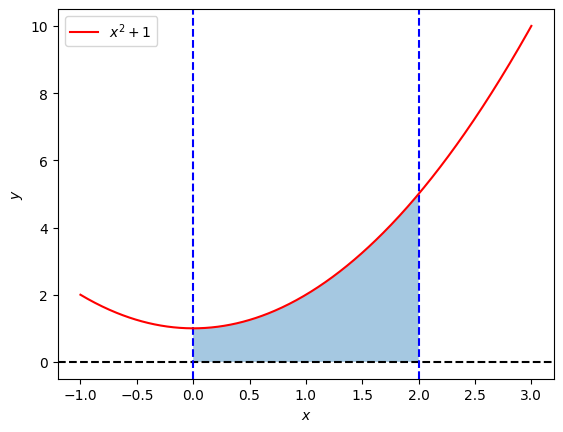

In [47]:
#A
x = sp.Symbol("x")
f = x**2 + 1

min_x = 0
max_x = 2

plot_int(f, x, min_x, max_x, r"$x^2 + 1$")

Solução: (84)



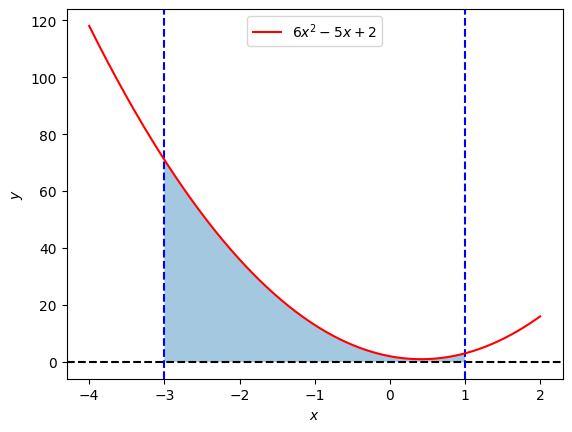

In [49]:
#B
x = sp.Symbol("x")
f = 6*x**2-5*x+2

min_x = -3
max_x = 1

plot_int(f, x, min_x, max_x, r"$6x^2-5x+2$")

#Questão 4 (vale até 1 ponto)
A taxa de variação de juros nos primeiros meses do ano de 2023 é dada por $v = 3t^2 - e^t$. Onde $t$ é o tempo dado em dias. Encontre a função que determina o juro, $j$ a ser pago em um determinado dia deste período de forma algébrica em latex.



Para encontrar a função $j(t)$, basta derivar a função $v(t)$:
$$j(t)=\int v(t) dt$$
$$j(t)=\int 3t^2-e^t dt$$
$$j(t)=\int 3t^2 dt - \int e^t dt$$
$$j(t)=3\int t^2 dt - \int e^t dt$$
$$j(t)=3 \frac{1}{3}t^3+c - e^t +c$$
$$j(t)=t^3- e^t +c$$

#Questão 5 (vale até 1 ponto)
Encontre o valor da constante C para a antiderivada $F(x)$ da função $f(x) = 3x^3 - 2x + 1$ de tal forma que $F(1)=0$. Apresente seus cálculos em latex e explique as decisões que tomou. 

Calculando a antiderivada:
$$F(x)=\int3x^3-3x+1dx$$
$$F(x)=\int3x^3dx-\int3xdx+\int1dx$$
$$F(x)=3\int x^3dx-3\int xdx+x$$
$$F(x)=3\frac{1}{4}x^4-3\frac{1}{2}x^2+x+c$$

Para que $F(1)=0$, então:
$$F(1)=3\frac{1}{4}(1)^4-3\frac{1}{2}(1)^2+(1)+c$$
$$0=3\frac{1}{4}(1)^4-3\frac{1}{2}(1)^2+(1)+c$$
$$0=\frac{13}{4}-\frac{14}{4}+\frac{4}{4}+c$$
$$0=\frac{3}{4}+c$$
$$c=-\frac{3}{4}$$